![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

Uses an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [12]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize': (18, 6)})

### Loading the Dataset

The data is located in the `data/census-data.csv` CSV file. **it doesn't have a header**. 

In [23]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1. Give the columns proper names

Replace the numbered column headers with descriptive headers.

In [24]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']
df.columns = col_names

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Clean the data

Some columns have invalid values (`workclass`, `occupation`, and `native-country`).

###### a. What are those invalid values?

Identify the invalid values of `workclass`.

In [16]:
# Method 1: compare list of valid values against list of values in data
valid_work_classes = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 
                      'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']
df_work_classes = df['workclass'].unique()
invalid_work_classes = np.setdiff1d(df_work_classes, valid_work_classes)
print(invalid_work_classes)

# Method 2: show number of records for each data value
print(df['occupation'].value_counts())
df['native-country'].value_counts()

['?']
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [9]:
# Results

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

###### b. Removing those rows

Your task now is to remove those invalid rows (all the ones containing `?`). There are different ways of doing this, so this is entirely up to you. This is the expected output of your dataframe:

In [26]:
df = df[df['workclass'].map(lambda x: x != '?')]
df = df[df['occupation'].map(lambda x: x != '?')]
df = df[df['native-country'].map(lambda x: x != '?')]
df.info()
# occupation had spaces before the ?, so a better approach for that column is:
df.drop(df[df['occupation'].str.contains('?', regex=False)].index, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [54]:
# Result:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30169 entries, 0 to 32560
Data columns (total 15 columns):
age               30169 non-null int64
workclass         30169 non-null object
fnlwgt            30169 non-null int64
education         30169 non-null object
education-num     30169 non-null int64
marital-status    30169 non-null object
occupation        30169 non-null object
relationship      30169 non-null object
race              30169 non-null object
sex               30169 non-null object
capital-gain      30169 non-null int64
capital-loss      30169 non-null int64
hours-per-week    30169 non-null int64
native-country    30169 non-null object
income            30169 non-null object
dtypes: int64(6), object(9)
memory usage: 4.9+ MB


### Exercise: Convert `income` to an ordered categorical type

As you'll see, `income` has two values `<=50K` and `>50K`:

In [27]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

Your job is to turn them into an **ORDERED** categorical type with the following order: `['<=50K', '>50K']`

In [28]:
# This is the right way but I have the wrong version of something, import does not work
from pandas.api.types import CategoricalDtype
df['income']=df['income'].astype(CategoricalDtype(categories=['<=50K', '>50K'], ordered=True))
df['income'].dtype

ImportError: cannot import name 'CategoricalDtype'

In [64]:
# Expected result:
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=True)

### Exercise: Create a dummy variable _">50K"_ or _"<=50K"_ and concatenate them to our dataframe.

In [29]:
under_50K = {'<=50K': 1, '>50K': 0}
over_50K = {'<=50K': 0, '>50K': 1}
df['<=50K'] = df['income'].map(under_50K)
df['>50K'] = df['income'].map(over_50K)

df.tail()
# That was the hard way. Easier way:
# df = pd.concat([df, pd.get_dummies(df['income'])], axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,0,1


In [21]:
# Expected result:

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


### Exercise: Plot a **distplot** showing the distribution of `age`.

int64


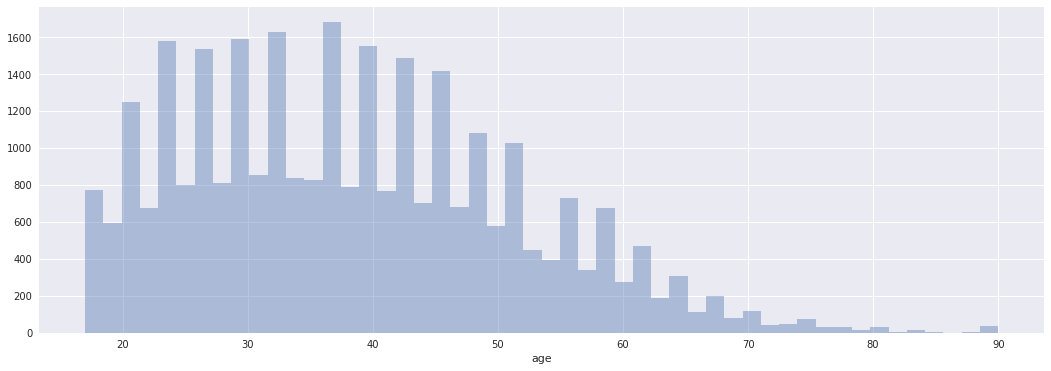

In [30]:
sns.distplot(df['age'], kde=False) 
# kde must be False or statsmodels error is raised

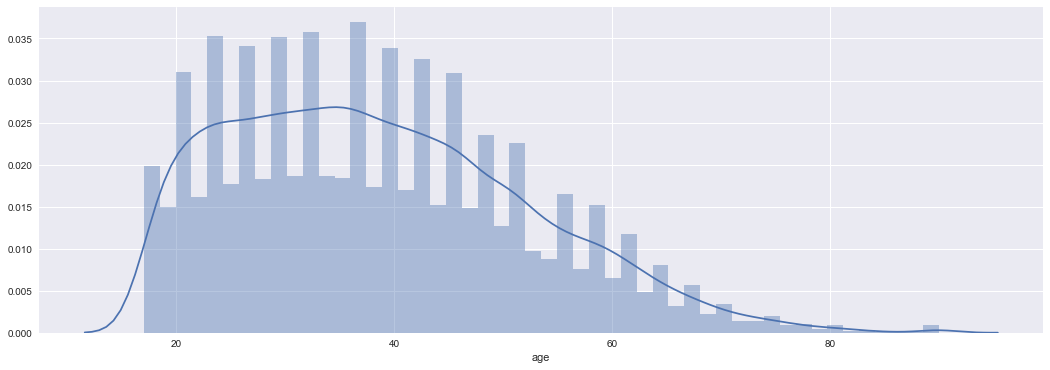

In [57]:
# Expected output

### Exercise: Plot a **boxplot** showing the distribution of `age`.

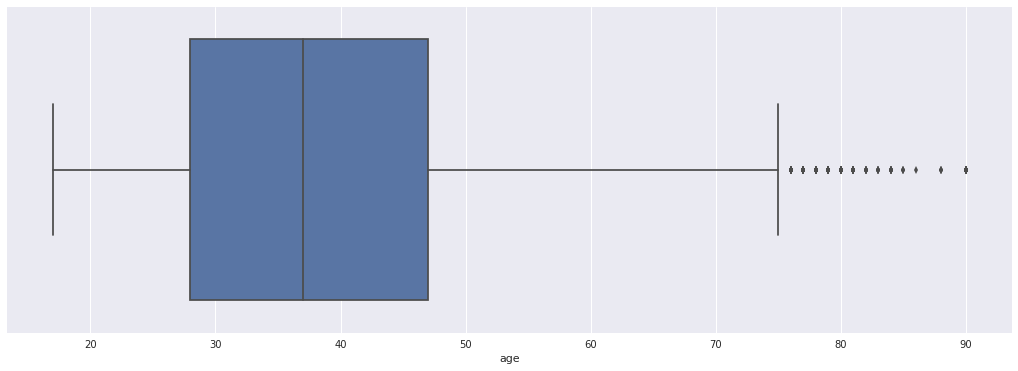

In [31]:
sns.boxplot(df['age'])
# or, 
# sns.boxplot(data=df, x='age')

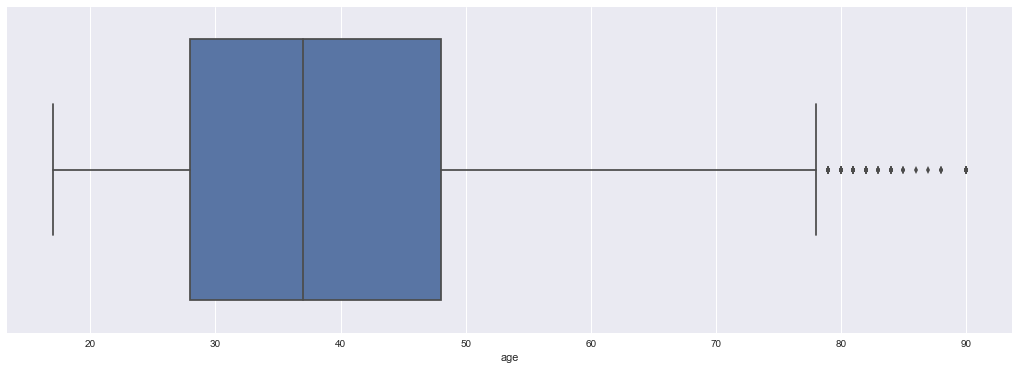

In [56]:
# Expected output

### Exercise: Remove outlier values from `age` and plot the previous boxplot again.

_Suppose values higher than 70 as outliers_.

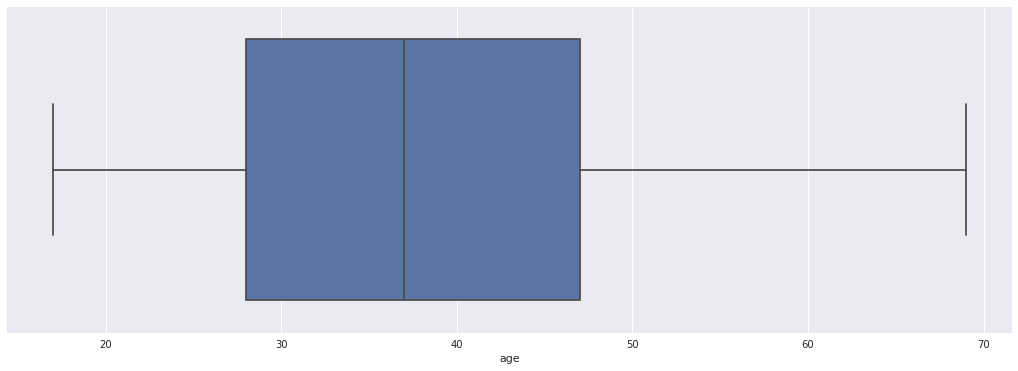

In [32]:
df2 = df[df['age'] < 70]
sns.boxplot(df2['age'])

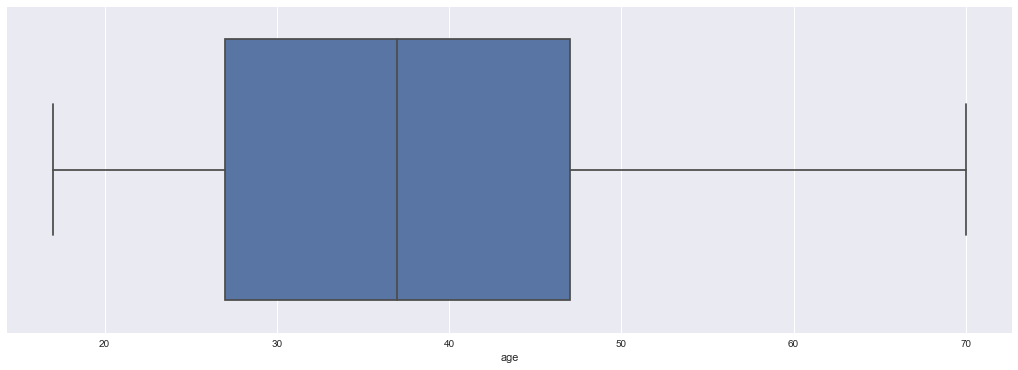

In [54]:
# Expected solution:

### Exercise: How many people work more than 20 hours per week?

In [33]:
df[df['hours-per-week'] > 20]['hours-per-week'].count()

27774

In [22]:
# Expected output

29633

### Exercise: How many men and women are? Show totals and proportion over all the data.

In [54]:
men = df[df['sex'] == 'Male']['sex'].count()
women = df[df['sex'] == 'Female']['sex'].count()
print('Male count: ', men, '\nFemale count: ', women)
print('Male proportion', men / (men + women))
print('Female proportion', women / (men + women))

Male count:  20380 
Female count:  9782
Male proportion 0.6756846362973278
Female proportion 0.3243153637026722


In [25]:
# Expected output

Male count: 21790
Female count: 10771
Male proportion: 0.6692054912318418
Female proportion: 0.33079450876815825


### Exercise: Plot a bar plot showing the income by gender

_Hint: Check [countplots](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) in Seaborn docs_

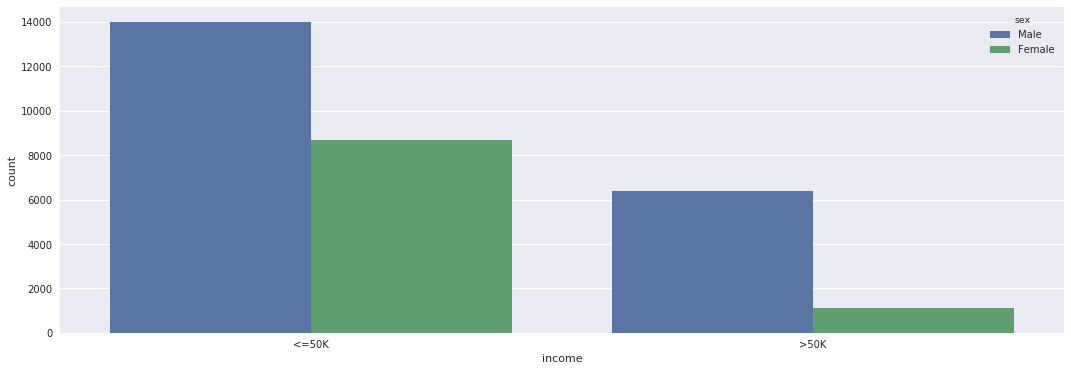

In [35]:
sns.countplot(x='income', hue='sex', data=df)

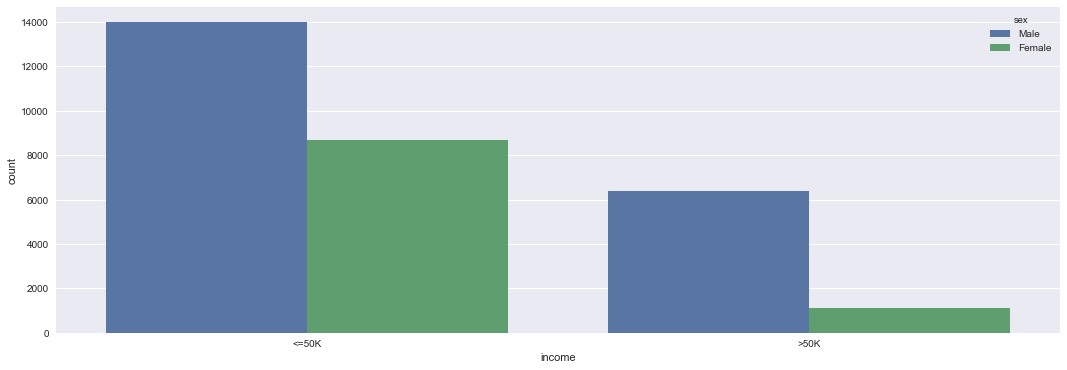

In [65]:
# Expected Result:

### Exercise: Create a bar plot showing count of `race`s

It should look like this:

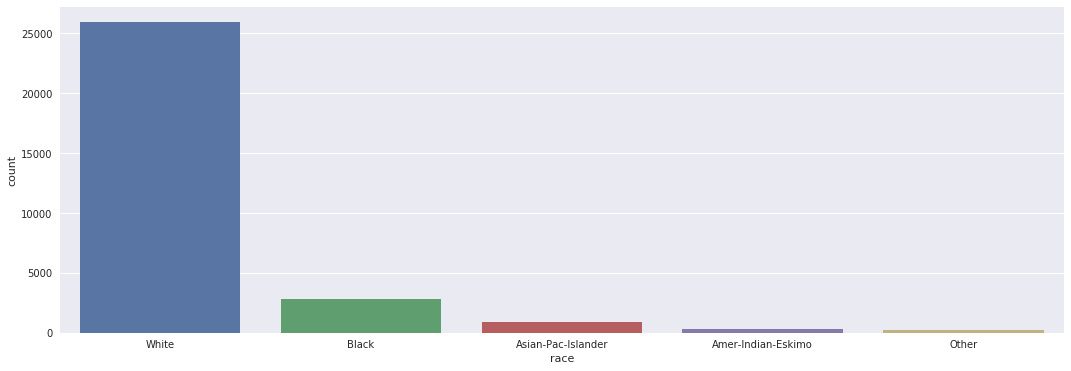

In [36]:
sns.countplot(x='race', data=df)

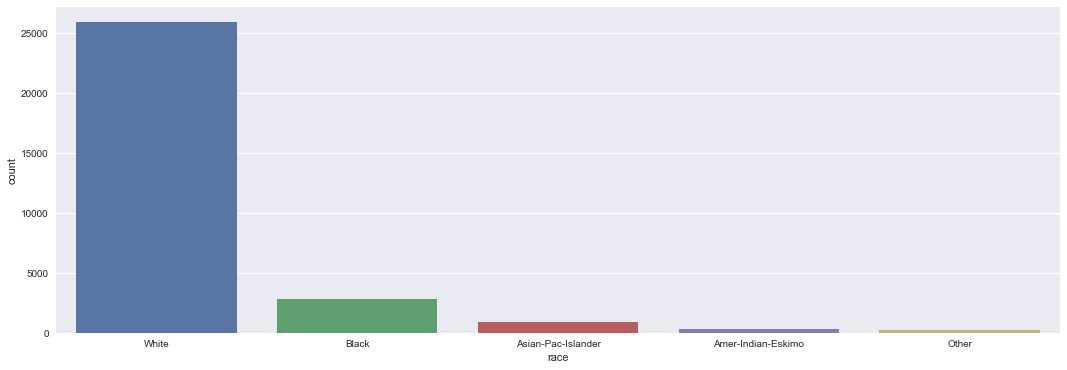

In [84]:
# Expected result

### Exercise: Count per `race`

Using grouping and aggregation functions, count how many people are per each race:

In [37]:
df.groupby('race')['race'].count()

race
Amer-Indian-Eskimo      286
Asian-Pac-Islander      895
Black                  2817
Other                   231
White                 25933
Name: race, dtype: int64

In [18]:
# Expected result:

,race,count
0,Amer-Indian-Eskimo,311
1,Asian-Pac-Islander,1039
2,Black,3124
3,Other,271
4,White,27816


### Exercise: Create a barplot with the `occupation` column

We want to check the number of people for each `occupation`. In this case, we want to see a nice, sorted plot like this one:

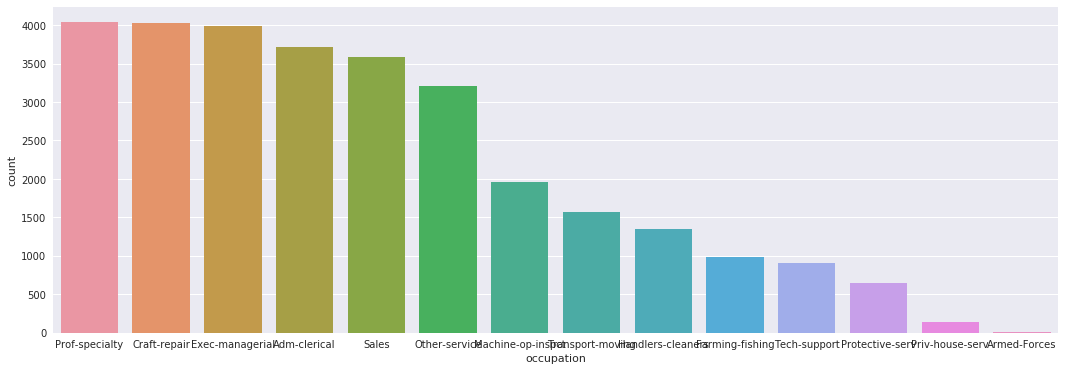

In [38]:
occupation_order = list(df['occupation'].value_counts().index)
sns.countplot(x = 'occupation', 
              data = df,
              order = occupation_order)

# alternate method
# sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index)

In [140]:
# Expected result:

### Exercise: Count per `occupation`

Using grouping and aggregation functions, count how many people are per each occupation:

In [39]:
df.groupby('occupation').agg({'occupation': 'count'})

,occupation
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


In [121]:
# Expected output

,count
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


### Exercise: Display capital gains per occupation

Capital gain is defined as _"income from investment sources, apart from wages/salary"_, is basically people generating profits from investments out of their regular job. Show the **average** capital gain per occupation. It should look something like this:

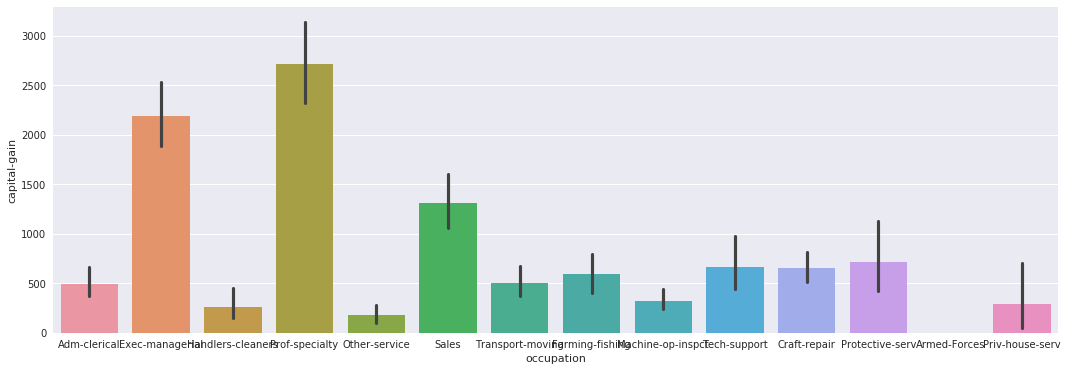

In [40]:
sns.barplot(x = 'occupation', 
            y = 'capital-gain',
            data = df)

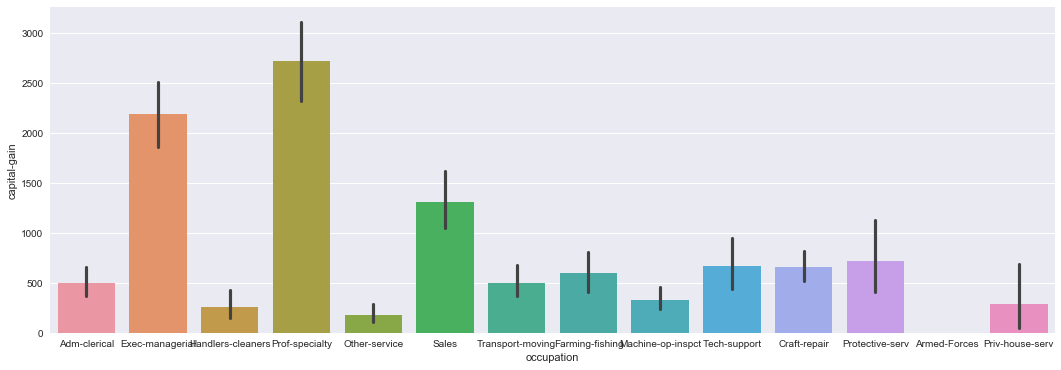

In [83]:
# Expected result:

### Exercise: Use grouping to obtain the same results as the previous plot

Using grouping functions, generate the same results as the plot above. Expected output:

In [41]:
df.groupby('occupation').agg({'capital-gain': 'mean'})
# alternate method
# df['capital-gain'].groupby(df['occupation']).aggregate(np.mean)

,capital-gain
occupation,
Adm-clerical,497.097286
Armed-Forces,0.000000
Craft-repair,657.586849
Exec-managerial,2185.330912
Farming-fishing,592.707786
Handlers-cleaners,258.140000
Machine-op-inspct,323.825025
Other-service,181.705479
Priv-house-serv,291.594406


In [110]:
# Expected result

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

### Exercise: Bar plot: average capital gain per race and group

Create a bar plot that shows in that has `race` as the X axis, a `sex` hue and displays the average capital gain for each group. Expected output:

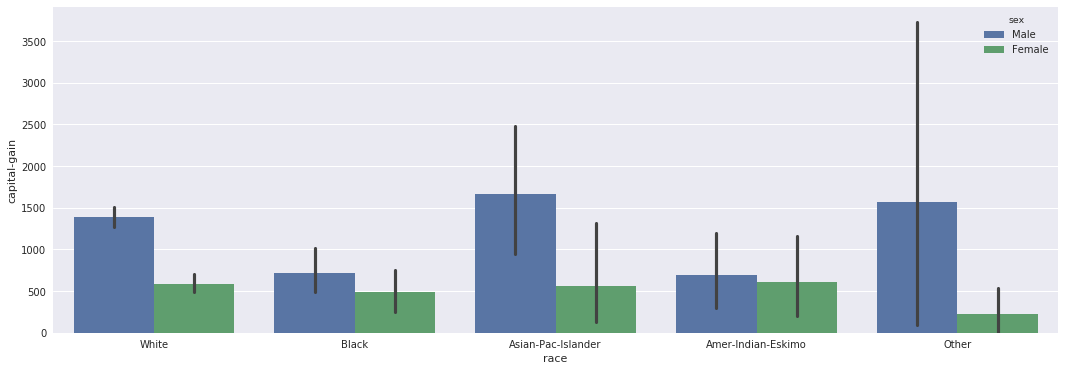

In [46]:
sns.barplot(x = 'race',
            y = 'capital-gain',
            hue = 'sex',
            estimator = np.mean,
            data = df)

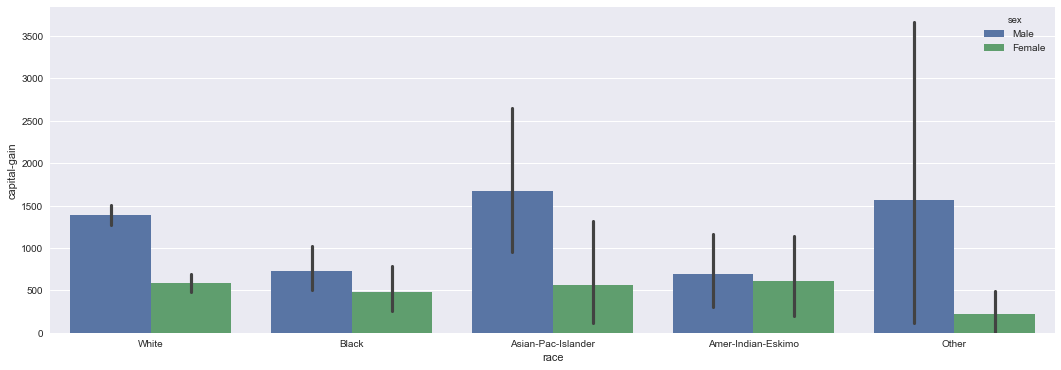

In [89]:
# Expected output

### Exercise: Use grouping to obtain the same results as the previous plot

Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group.

In [51]:
df.groupby(['race', 'sex'])['capital-gain'].mean()
# alternate method
# df['capital-gain'].groupby([df['race'], df['sex']]).mean()

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

In [92]:
# Expected output

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)